# Psyplot with cfgrib

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib widget

In [3]:
import psyplot.project as psy

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from IPython.display import display, Video

from ipympl.backend_nbagg import Canvas
Canvas.header_visible.default_value = False

import warnings
warnings.filterwarnings("ignore", r"\s*The on_mappable_changed")
warnings.filterwarnings("ignore", r"\s*The input coordinates")
warnings.filterwarnings("ignore", r"\s*shading=")
warnings.filterwarnings("ignore", r"\s*\[Warning by")

In [4]:
f_icon_irr = '/scratch/walser/icon-vis/icon-1/21112300.grb2/lfff00000000'
f_icon_reg = '/store/s83/tsm/ICON-1E/FCST21/21112300_606/grib/i1effsurf000_001'
f_cosmo = '/store/s83/osm/KENDA-1/ANA21/det/laf2021112300'

gridfile='/scratch/cmerker/data/icon_grid/icon_grid_0001_R19B08_L.nc'

## 1.0 Open GRIP2 file with gridfile argument in psy.open_dataset

In [5]:
ds_cfgrib_withgridfile = psy.open_dataset(f_icon_irr, decode_cf=True, gridfile=gridfile, engine='cfgrib',  backend_kwargs={'indexpath': '', 'errors': 'ignore'})

#### Encoding.coordinates is not correct and so won't plot lon and lat on the axis.

In [6]:
ds_cfgrib_withgridfile.t2m.encoding

{'source': '/scratch/walser/icon-vis/icon-1/21112300.grb2/lfff00000000',
 'filter_by_keys': {},
 'encode_cf': ('parameter', 'time', 'geography', 'vertical'),
 'original_shape': (1028172,),
 'dtype': dtype('float32'),
 'coordinates': 'number time step heightAboveGround valid_time'}

In [7]:
#figure1 = ds_cfgrib_withgridfile.psy.plot.mapplot(
#    name="t2m", xgrid='None',  ygrid='None'
#)

## 2.0 Open GRIP2 file using psy.open_dataset with cfgrib engine

In [8]:
ds_cfgrib = psy.open_dataset(f_icon_irr, engine='cfgrib',  backend_kwargs={'indexpath': '', 'errors': 'ignore'})

ds_cfgrib

<xarray.Dataset>
Dimensions:               (values: 1028172, generalVerticalLayer: 80, depthBelowLandLayer: 8, depthBelowLand: 9, generalVertical: 81)
Coordinates: (12/21)
    number                int64 ...
    time                  datetime64[ns] ...
    step                  timedelta64[ns] ...
    surface               float64 ...
    valid_time            datetime64[ns] ...
    isobaricLayer         float64 ...
    ...                    ...
  * depthBelowLandLayer   (depthBelowLandLayer) float64 0.0 0.01 ... 2.43 7.29
    heightAboveGround     float64 ...
    lakeBottom            float64 ...
    entireLake            float64 ...
  * depthBelowLand        (depthBelowLand) float64 0.0 0.005 0.02 ... 4.86 14.58
  * generalVertical       (generalVertical) float64 1.0 2.0 3.0 ... 80.0 81.0
Dimensions without coordinates: values
Data variables: (12/70)
    snfalb                (values) float32 ...
    lhtfl                 (values) float32 ...
    nlwrf                 (values) float32 ...
    dlwrf                 (values) float32 ...
    ulwrf                 (values) float32 ...
    shtfl                 (values) float32 ...
    ...                    ...
    sd                    (values) float32 ...
    W_SO                  (depthBelowLandLayer, values) float32 ...
    W_SO_ICE              (depthBelowLandLayer, values) float32 ...
    wz                    (generalVertical, values) float32 ...
    THHR_RAD              (generalVerticalLayer, values) float32 ...
    SOHR_RAD              (generalVerticalLayer, values) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lssw
    GRIB_centreDescription:  Zurich
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Zurich
    history:                 2022-01-05T14:41 GRIB to CDM+CF via cfgrib-0.9.9...

## 2.1 Open the corresponding R19B08 Grid for the GRIP file:
(No engine neeeded, engine only needed for grip files.)

In [9]:
ds_grid = psy.open_dataset(gridfile)

ds_grid

<xarray.Dataset>
Dimensions:                        (cell: 1028172, vertex: 515582, edge: 1543753, nv: 3, nc: 2, ne: 6, no: 4, max_chdom: 1, cell_grf: 14, edge_grf: 24, vert_grf: 13)
Coordinates:
    clon                           (cell) float64 ...
    clat                           (cell) float64 ...
    vlon                           (vertex) float64 ...
    vlat                           (vertex) float64 ...
    elon                           (edge) float64 ...
    elat                           (edge) float64 ...
    clon_vertices                  (cell, nv) float64 ...
    clat_vertices                  (cell, nv) float64 ...
    elon_vertices                  (edge, no) float64 ...
    elat_vertices                  (edge, no) float64 ...
    vlon_vertices                  (vertex, ne) float64 ...
    vlat_vertices                  (vertex, ne) float64 ...
Dimensions without coordinates: cell, vertex, edge, nv, nc, ne, no, max_chdom, cell_grf, edge_grf, vert_grf
Data variables: (12/45)
    cartesian_x_vertices           (vertex) float64 ...
    cartesian_y_vertices           (vertex) float64 ...
    cartesian_z_vertices           (vertex) float64 ...
    cell_area                      (cell) float64 ...
    dual_area                      (vertex) float64 ...
    lon_cell_centre                (cell) float64 ...
    ...                             ...
    end_idx_e                      (max_chdom, edge_grf) int32 ...
    refin_v_ctrl                   (vertex) int32 ...
    start_idx_v                    (max_chdom, vert_grf) int32 ...
    end_idx_v                      (max_chdom, vert_grf) int32 ...
    parent_edge_index              (edge) int32 ...
    parent_vertex_index            (vertex) int32 ...
Attributes: (12/18)
    title:                ICON grid description
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    source:               svn://rclh.dwd.de/for0adm/SVN_icontools/tags/iconto...
    number_of_grid_used:  1
    ICON_grid_file_uri:   
    centre:               215
    ...                   ...
    inverse_flattening:   0.0
    grid_level:           8
    grid_root:            19
    uuidOfParHGrid:       2ca46b23-4b4f-fa2c-174f-7021314c2820
    uuidOfHGrid:          fc046f09-ed97-850e-1e31-8927421b2b60
    global_grid:          0

## 2.2 Combine GRID file with GRIP2 file, to have coordinates from GRID file with the GRIP data.

In [10]:
def openfiles(file, gridfile):
    ds_cfgrib = psy.open_dataset(file, engine='cfgrib',  backend_kwargs={'indexpath': '', 'errors': 'ignore'})
    ds_grid = psy.open_dataset(gridfile)
    return ds_cfgrib, ds_grid

In [11]:
def combine_grip_grid(file, grid):
    
    result = file.rename({'time': 'init_time','valid_time': 'time'}
                        ).rename_dims({'values':'ncells'}
                        ).assign_coords(
                        clon=('ncells', np.float32(grid.coords['clon'].values))
                        ).assign_coords(
                        clat=('ncells', np.float32(grid.coords['clat'].values))
                        ).assign_coords(
                        clat_bnds=(('ncells','vertices'), np.float32(grid.coords['clat_vertices'].values))
                        ).assign_coords(
                        clon_bnds=(('ncells','vertices'), np.float32(grid.coords['clon_vertices'].values))
                        ).expand_dims('time')
    
    result.clon.attrs['standard_name']='longitude'
    result.clon.attrs['long_name']='center longitude'
    result.clon.attrs['units']='radian'
    result.clon.attrs['bounds']='clon_bnds'
    result.clat.attrs['standard_name']='latitude'
    result.clat.attrs['long_name']='center latitude'
    result.clat.attrs['units']='radian'
    result.clat.attrs['bounds']='clat_bnds'

    result.time.attrs['axis']='T'
    result.generalVerticalLayer.attrs['positive']='up'
    result.generalVerticalLayer.attrs['axis']='Z'
    
    return result

In [12]:
ds_cfgrib, ds_grid = openfiles(f_icon_irr, gridfile)
ds_cfgrib_combi = combine_grip_grid(ds_cfgrib, ds_grid)

### Coordinate encoding of variables remains incorrect, must be corrected.

In [13]:
print(ds_cfgrib_combi.t.encoding['coordinates'])

number time step generalVerticalLayer valid_time


In [14]:
ds_cfgrib_combi.t.encoding['coordinates'] = 'clon clat'
print(ds_cfgrib_combi.t.encoding['coordinates'])

clon clat


In [15]:
import six

def add_encoding(obj):
    print(obj.attrs['GRIB_shortName'])
    print(obj.encoding['coordinates'])
    obj.encoding['coordinates'] = 'clat clon'
    print(obj.encoding['coordinates'])
    print('-------------------------------------')

    
for k, v in six.iteritems(ds_cfgrib_combi.data_vars):
    print(v.attrs['GRIB_name'])
    add_encoding(v)

Albedo - diffusive solar (0.3 - 5.0 m-6)
ALB_DIF
number time step surface valid_time
clat clon
-------------------------------------
Latent Heat Net Flux (m)
ALHFL_S
number time step surface valid_time
clat clon
-------------------------------------
Net long wave radiation flux (m) (at the surface)
ATHB_S
number time step surface valid_time
clat clon
-------------------------------------
Downward long-wave radiation flux avg
ATHD_S
number time step surface valid_time
clat clon
-------------------------------------
Surface upward thermal radiation
ATHU_S
number time step surface valid_time
clat clon
-------------------------------------
Sensible Heat Net Flux (m)
ASHFL_S
number time step surface valid_time
clat clon
-------------------------------------
Net short wave radiation flux (at the surface)
ASOB_S
number time step surface valid_time
clat clon
-------------------------------------
Downward diffusive short wave radiation flux at surface (mean over forecast time)
ASWDIFD_S
number 

### Now the variables are ready to be plotted.

In [28]:
ds_cfgrib_combi

<xarray.Dataset>
Dimensions:               (time: 1, ncells: 1028172, generalVerticalLayer: 80, depthBelowLandLayer: 8, depthBelowLand: 9, generalVertical: 81, vertices: 3)
Coordinates: (12/26)
    number                int64 1
    init_time             datetime64[ns] 2021-11-23
    step                  timedelta64[ns] 00:00:00
    surface               float64 0.0
  * time                  (time) datetime64[ns] 2021-11-23
    isobaricLayer         float64 0.0
    ...                    ...
  * generalVertical       (generalVertical) float64 1.0 2.0 3.0 ... 80.0 81.0
    clon                  (ncells) float32 -0.003694 -0.003783 ... 0.2608 0.2607
    clat                  (ncells) float32 0.8636 0.8635 0.8632 ... 0.868 0.8679
    clat_bnds             (ncells, vertices) float32 0.8635 0.8637 ... 0.8678
    clon_bnds             (ncells, vertices) float32 -0.003566 ... 0.2605
  * ncells                (ncells) int64 0 1 2 3 ... 1028169 1028170 1028171
Dimensions without coordinates: vertices
Data variables: (12/70)
    snfalb                (time, ncells) float32 0.07 0.07 ... 0.1171 0.1179
    lhtfl                 (time, ncells) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    nlwrf                 (time, ncells) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    dlwrf                 (time, ncells) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ulwrf                 (time, ncells) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    shtfl                 (time, ncells) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ...                    ...
    sd                    (time, ncells) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    W_SO                  (time, depthBelowLandLayer, ncells) float32 0.0 ......
    W_SO_ICE              (time, depthBelowLandLayer, ncells) float32 0.0 ......
    wz                    (time, generalVertical, ncells) float32 -0.009946 ....
    THHR_RAD              (time, generalVerticalLayer, ncells) float32 1.237e...
    SOHR_RAD              (time, generalVerticalLayer, ncells) float32 0.0 .....
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lssw
    GRIB_centreDescription:  Zurich
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Zurich
    history:                 2022-01-05T14:41 GRIB to CDM+CF via cfgrib-0.9.9...

/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


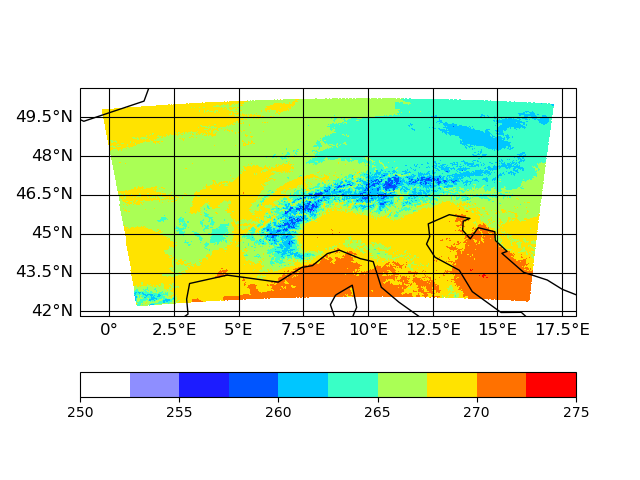

In [16]:
newfigure2_2 = ds_cfgrib_combi.psy.plot.mapplot(
    name="t", generalVerticalLayer=50, time=0
)

In [17]:
# newfigure.update(datagrid={'c': 'k', 'lw': 0.1})
newfigure2_2.update(cmap='Reds', datagrid=None, xgrid='None',  ygrid='None')
newfigure2_2.update(clabel='{desc}')
newfigure2_2.update(title=(f"{ds_cfgrib_combi.t.attrs['GRIB_name']} on "
                        f"{ds_cfgrib_combi.t.attrs['GRIB_typeOfLevel']} " 
                        f"%({ds_cfgrib_combi.t.attrs['GRIB_typeOfLevel']})s "
                        f"at %(time)s ")
                )

/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


## 3.0 Custom Plotter and FormatOptions

In [18]:
from psyplot.plotter import Formatoption
import psyplot.project as psy

from psy_simple.plotters import CMap, Bounds
from psy_maps.plotters import Transform, MapPlot2D, LonLatBox, MapPlotter
from psyplot.plotter import Plotter
import psy_simple.plotters
import psy_maps.plotters
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

### Borders Formatoption

In [19]:
import cartopy.feature as cf;
class Borders(Formatoption):
    """Draw borders on a map"""
    
    default = {'color': 'black', 'linewidth': 0.0}

    def validate(self, value):
        if type(value) is dict:
            return value
        else:
            return bool(value)

    def update(self, value):
        if type(value) is dict:
            self.borders = self.ax.add_feature(cf.BORDERS, color=value['color'], linewidth=value['linewidth'])
        elif value is True:
            self.borders = self.ax.add_feature(cf.BORDERS, color='black', linewidth=1.0)
        else:
            if hasattr(self, "borders"):
                self.borders.remove()
                del self.borders

In [20]:
psy.plot.mapplot.plotter_cls.borders = Borders("borders")

### Custom Text Formatoption

In [21]:
class CustomText(Formatoption):
    
    #: the default value for the formatoption
    default = 'initial value'
    
    def initialize_plot(self, value):
        # method initialize the plot in the very beginning
        # self.text = self.ax.text(self.data.lon.values.mean(), self.data.lat.values.mean(), value, fontsize="xx-large")
        self.text = self.ax.text(0., -0.15, 
                                 value, 
                                 fontsize="xx-large", 
                                 # ha='right', va='top',   # text alignment,
                                 transform=self.ax.transAxes      # coordinate system transformation)
        # self.text = self.ax.text(  # position text relative to Figure
        #    0.0, 1.0, 'figure corner',
        #    ha='left', va='top',
        #    transform=self.ax.get_figure().transFigure
        )
    def update(self, value):
        # method to update the plot
        self.text.set_text(value)

In [22]:
psy.plot.mapplot.plotter_cls.customtext = CustomText("customtext")

### Custom Lakes and Rivers Formatoption

In [35]:
class LakesRivers(Formatoption):
    
    #: the default value for the formatoption
    default = 'initial value'
    
    def initialize_plot(self, value):
        # method initialize the plot in the very beginning
        # self.text = self.ax.text(self.data.lon.values.mean(), self.data.lat.values.mean(), value, fontsize="xx-large")
        self.text = self.ax.text(0., -0.15, 
                                 value, 
                                 fontsize="xx-large", 
                                 # ha='right', va='top',   # text alignment,
                                 transform=self.ax.transAxes      # coordinate system transformation)
        # self.text = self.ax.text(  # position text relative to Figure
        #    0.0, 1.0, 'figure corner',
        #    ha='left', va='top',
        #    transform=self.ax.get_figure().transFigure
        )
    def update(self, value):
        # method to update the plot
        self.text.set_text(value)

In [36]:
psy.plot.mapplot.plotter_cls.lakesrivers = LakesRivers("lakesrivers")

/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site

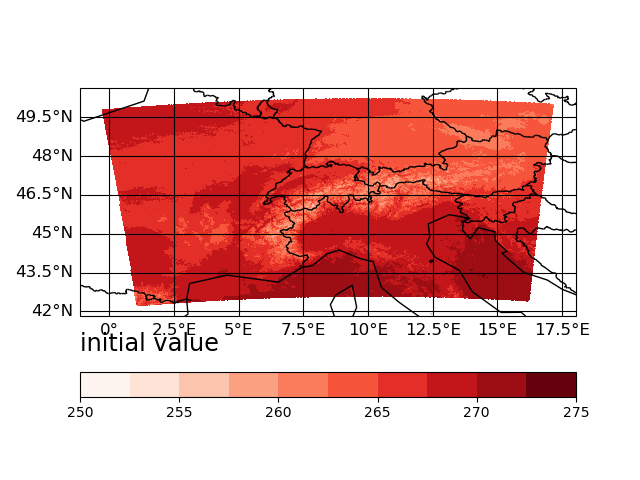

In [23]:
newfigure3 = ds_cfgrib_combi.psy.plot.mapplot(
    name="t", generalVerticalLayer=50, time=0, borders=True, cmap='Reds'
)

In [24]:
#sp.update(lonlatbox='Switzerland')
newfigure3.update(customtext='updated text', xgrid=None, ygrid=None)

## 4.0 Combined Mapplot - Wind + Temperature

/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/scratch/vcherkas/envs/

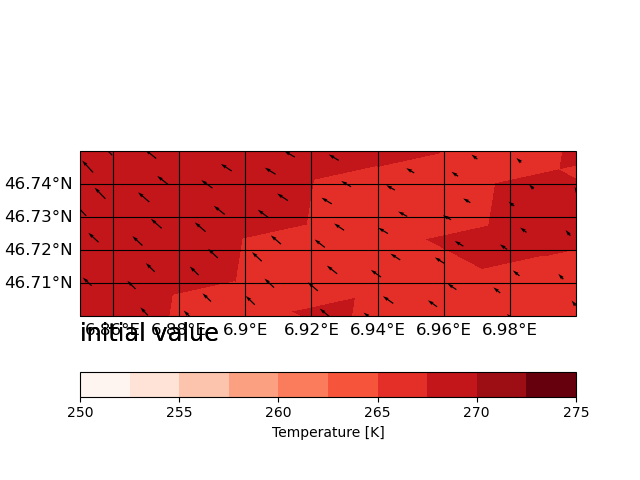

In [48]:
newfigure4 = ds_cfgrib_combi.psy.plot.mapcombined(
            name=[['t',['u','v']]], 
            generalVerticalLayer=50, time=0, datagrid={'c': 'k', 'lw': 0.1}, xgrid=None, ygrid=None
            borders=True, 
            cmap='Reds', 
            arrowsize=100, 
            vcbar='r',
            clabel='{desc}', 
            vclabel='Wind Speed [%(units)s]',
            map_extent=[6.85, 7.0, 46.7, 46.75]
            )

In [50]:
newfigure4.update(datagrid={'c': 'k', 'lw': 0.1}, xgrid=None, ygrid=None)

/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site